#House Price Data and Linear Regression



Importing of Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

Displaying the dataset:

In [ ]:
# House Price Data (hpdf), hpdf.size = 3600 , hpdf.shape = (300, 12)

hpdf = pd.read_csv('housePriceData.csv')
hpdf.head(11)

size  bedrooms  bathrooms  extraRooms  garage  garden  inSubdivision  \
0    164         2          2           3       0       0              0   
1     84         2          4           2       0       1              1   
2    190         2          4           2       1       0              0   
3     75         2          4           1       0       1              1   
4    148         1          2           2       1       1              0   
5    124         3          3           1       0       1              0   
6     58         1          2           3       0       0              1   
7    249         2          1           1       1       1              0   
8    243         1          2           1       0       1              1   
9    242         1          4           2       0       0              1   
10    61         2          5           1       0       1              1   

    inCity  solarPowered  price  damages   discount  
0        1             1  43800       77  79.775152  
1        0             1  37550       21  23.177279  
2        1             0  49500       22  25.609262  
3        1             1  50075       20  17.857388  
4        0             1  52400       36  41.849864  
5        1             1  54300       15   9.805235  
6        1             1  34400       62  58.874659  
7        0             1  50425       95  97.617937  
8        0             0  29575       20  18.395127  
9        0             0  22300        5   8.746748  
10       1             1  49725        4   2.811416

Checking for null values for pre-processing and cleaning of the data:

In [ ]:
# Checking if a column has a null value
hpdf.isnull().sum()

size             0
bedrooms         0
bathrooms        0
extraRooms       0
garage           0
garden           0
inSubdivision    0
inCity           0
solarPowered     0
price            0
damages          0
discount         0
dtype: int64

**Splitting of dataset:**

In [ ]:
# Chipping off 10% of the entire dataset for the unseen_data and saving the rest
# for training and testing data. Random state 42 keeps the split constant.
unseen_data = hpdf.sample(frac=0.1, random_state=42)
train_test_data = hpdf.drop(unseen_data.index)

# Splits the remaining 90% (train_test_data) with an 80/20 split for train_data
# and test_data respectively.
train_data, test_data = train_test_split(train_test_data, train_size=0.8,
                                         random_state=42)

# Validation of the splitting:
print("Unseen Data Size:", unseen_data.size)      # 3600 * 0.1 = 360
print("Training Data Size:", train_data.size)     # 3240 * 0.8 = 2592
print("Test Data Size:", test_data.size)          # 3240 * 0.2 = 648

print("\nUnseen Data Shape:", unseen_data.shape)  # 30 * 12 = 360
print("Training Data Shape:", train_data.shape)   # 216 * 12 = 2592
print("Test Data Shape:", test_data.shape)        # 54 * 12 = 648

Unseen Data Size: 360
Training Data Size: 2592
Test Data Size: 648

Unseen Data Shape: (30, 12)
Training Data Shape: (216, 12)
Test Data Shape: (54, 12)


# Scenario A: Simple Linear Regression

a. Displaying the descriptive statistics of the discount amounts.

In [ ]:
discounts = hpdf['discount']
mean_discount = round(discounts.mean(), 2)
median_discount = round(discounts.median(), 2)
# mode_discount = discount.mode()

print("Mean Discount:", mean_discount)
print("Median Discount:", median_discount)

# Checking for any form of outliers via Interquartile Range:
Q1 = discounts.quantile(0.25)
Q3 = discounts.quantile(0.75)
IQR = Q3 - Q1

# Identifying the outliers within the discount column
outliers = discounts[(discounts < (Q1 - 1.5 * IQR)) | (discounts > (Q3 + 1.5 * IQR))]

print(f"Outliers: {outliers.shape}")

Mean Discount: 51.21
Median Discount: 52.17
Outliers: (0,)


***Remarks:*** The computed mean and median of the entire dataset's discount prices on the properties are $51.21 and $52.17 respectively. One can state that the average discount price for a property would range between those two values. Though the mode was also computed beforehand, as it turns out there are no repeated values and so the most reliable ways to assess the discount amounts via descriptive statistics are the mean and median. The mean would be a reliable metric considering that there are no outliers in the discount column.

b. Create a scatter plot using the “damages” column as the independent variable and
the “discount” column as the dependent variable.



In [ ]:
y = hpdf['discount'] # dependent
x = hpdf['damages']  # independent

In scenario A, we are meant to predict the discount (y)
 given a quantified
damage in the property (x). It is important to visualize the data for us to know if a correlation exists or if the model we're about to use is necessary for the dataset:

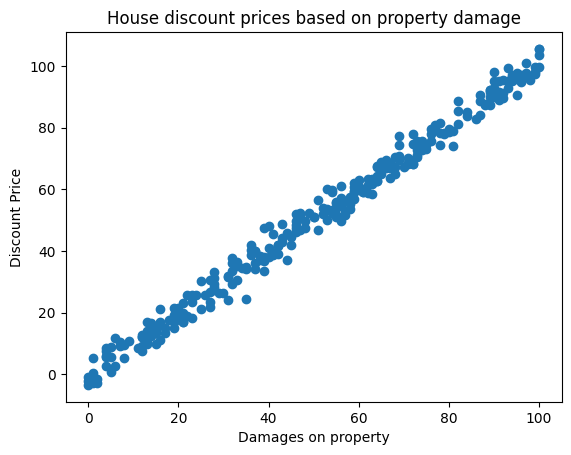

In [ ]:
plt.scatter(x, y)
plt.title("House discount prices based on property damage")
plt.xlabel("Damages on property")
plt.ylabel("Discount Price")
plt.show()

***Remarks:*** The positive (increasing slope) linear relationship between the Discount Price and Damages on property is quite obvious as the scatterplot resembles a diagonal line. They have a positive relationship: as the property damage increases, the bigger the discount.


Determine the correlation between the “damages” and “discount” columns.






In [ ]:
# Takes the damages and discount columns to see if they have a correlation
# damage_discount.shape = (216, 2)
damage_discount = hpdf[['damages', 'discount']]
damage_discount.corr(method='pearson')

damages  discount
damages   1.000000  0.994545
discount  0.994545  1.000000

***Remarks:*** The output showed a very strong positive correlation score of 0.9945 between the discount and the damages. In corroboration with the noticeable positive trend in the scatterplot, it suggests that a strong linear relationship exists between the two. A property with more damages incurs higher discounts.

d. Create a simple linear regression model using the “damages” column as the
independent variable and the “discount” column as the dependent variable.

In building the model, we need to transform the independent variable (x_train in this scenario) from 1D to 2D to tell the model that each value (now a row) in x_train is a data point. If x_train is a series (1D), then it'd raise an error because Linear Regression expects a 2D array for the independent variable:


In [ ]:
# Assigning of the discount column to dependent variable and damages to
# independent variable.
y_train = train_data['discount']
x_train = train_data['damages']

y_test = test_data['discount']
x_test = test_data['damages']

y_unseen = unseen_data['discount']
x_unseen = unseen_data['damages']

# The model takes 2-dimensional arrays so we must reshape x
x_train = np.array(x_train).reshape(-1, 1) # keep rows (-1), add column (1)
x_test = np.array(x_test).reshape(-1, 1)
x_unseen = np.array(x_unseen).reshape(-1, 1)

# Building of the simple linear regression (slr) model:
slr_model = LinearRegression()
slr_model.fit(x_train, y_train)

LinearRegression()

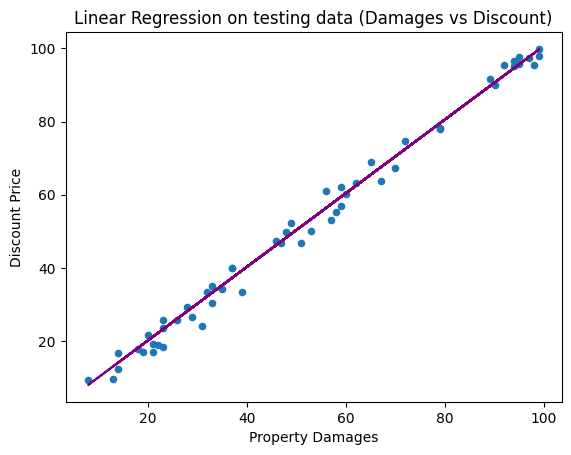

In [ ]:
y_predict_test = slr_model.predict(x_test)
plt.title("Linear Regression on testing data (Damages vs Discount)")
plt.scatter(x_test, y_test, s = 20)
plt.plot(x_test, y_predict_test, color="purple")
plt.xlabel("Property Damages")
plt.ylabel("Discount Price")
plt.show()

***Remarks:*** This is a simple linear regression model where it finds the "best-fit line" along the plotted datapoints. It practically models the relationship between the dependent variable "y" (discount) and one independent variable "x" (damages). Upon training the model, the coefficient, intercept, and x values help calculate the best fit line as well as estimating/predicting y.

e. Evaluate the developed regression model based on different performance metrics.



Metrics for testing data:

In [ ]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_predict_test)
print("Mean Squared Error: ", mse)

# Root MSE
root_mse = np.sqrt(mean_squared_error(y_test, y_predict_test))
print("Root Mean Squared Error: ", root_mse)

# R-Squared Coefficient
r_squared = r2_score(y_test, y_predict_test)
print("R-squared: ", r_squared)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_predict_test)
print("Mean Absolute Error:", mae)

Mean Squared Error:  7.34132737563862
Root Mean Squared Error:  2.7094883973987822
R-squared:  0.991106979271883
Mean Absolute Error: 2.267820833042749


***Remarks:***


*   MSE - Practically measures the average squared difference between the predicted values (y_predict_test) and the actual values (y_test). Measuring how far the predictions are from the actual output; a mean squared error of 7.34 indicates that there is a good fit between the predicted discounts but considering a number closer to 0 is optimal, it needs improvement.

*   RMSE - Similarly a lower RMSE would also indicate a good model, it provides a more interpretable measure of the average error between the predicted discount and actual discount. In this case, the average error is around $2.709 for the discount. Though it is good, the model needs improvement to try and get the RMSE closer to 0.

*   R-Squared - Tells how well the changes in damages explain the changes in discount. An R-squared score of 0.99 (close to 1) indicates that changes in "damages' explains/affects the changes in discounts. In essence this model captured a strong linear relationship between damages and discounts

*   Mean Absolute Error - The average absolute difference between predicted and actual discount prices is 2.267. Given that a lower Mean Absolute Error is desirable, the model's predictions are not far off from the actual discount prices.


f. Predict the discount amounts on the remaining 10% unseen data.



In [ ]:
x_unseen.shape

(30, 1)

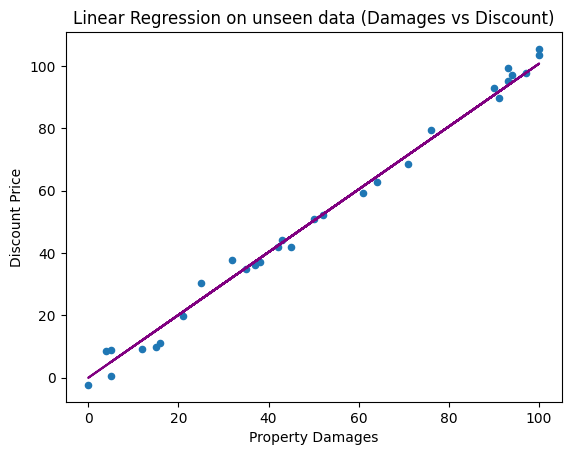

In [ ]:
y_predict_unseen = slr_model.predict(x_unseen)
plt.title("Linear Regression on unseen data (Damages vs Discount)")
plt.scatter(x_unseen, y_unseen, s = 20)
plt.plot(x_unseen, y_predict_unseen, color="purple")
plt.xlabel("Property Damages")
plt.ylabel("Discount Price")
plt.show()

Metrics for unseen data:

In [ ]:
# Mean Squared Error
mse_unseen = mean_squared_error(y_unseen, y_predict_unseen)
print("Mean Squared Error: ", mse_unseen)

# Root MSE
root_mse_unseen  = np.sqrt(mean_squared_error(y_unseen, y_predict_unseen))
print("Root Mean Squared Error: ", root_mse_unseen)

# R-Squared Coefficient
r_squared_unseen = r2_score(y_unseen, y_predict_unseen)
print("R-squared: ", r_squared_unseen)

# Mean Absolute Error
mae_unseen = mean_absolute_error(y_unseen, y_predict_unseen)
print("Mean Absolute Error:", mae_unseen)

Mean Squared Error:  10.02947565256669
Root Mean Squared Error:  3.1669347408127453
R-squared:  0.9914829996632736
Mean Absolute Error: 2.6522562562406202


The model seems to be performing fairly well on unseen data. Though there was a significant jump in the Mean Squared Error going from 7.34 to 10.02, it still sports a low difference between predicted and actual discount prices. Furthermore, the R-squared value on unseen data is also relatively high, increasing from 0.9911 from testing data to 0.9914, indicating that the model can very well explain the high proportion of the variance in discount prices based on the damages. Lastly, the mean absolute error of 2.267 entails that the predictions weren't that far off.

>>

<hr>
<h1> Multiple Linear Regression</h1>


<hr>Preparing the dataset

In [ ]:
x = hpdf.drop(columns=['damages', 'discount', 'price'])
x.head()

size  bedrooms  bathrooms  extraRooms  garage  garden  inSubdivision  \
0   164         2          2           3       0       0              0   
1    84         2          4           2       0       1              1   
2   190         2          4           2       1       0              0   
3    75         2          4           1       0       1              1   
4   148         1          2           2       1       1              0   

   inCity  solarPowered  
0       1             1  
1       0             1  
2       1             0  
3       1             1  
4       0             1

In [ ]:
y = hpdf['price']
y.head()

0    43800
1    37550
2    49500
3    50075
4    52400
Name: price, dtype: int64

In [ ]:
x_rem, x_valid, y_rem, y_valid = train_test_split(x, y, test_size=0.1, random_state=42)

print('X-Remaining:', len(x_rem))
print('Y-Remaining:', len(y_rem))
print('X-Validation:', len(x_valid))
print('Y-Validation:', len(y_valid))

X-Remaining: 270
Y-Remaining: 270
X-Validation: 30
Y-Validation: 30


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_rem, y_rem, test_size=0.2, random_state=42)

print('X-Training:', len(x_train))
print('Y-Training:', len(y_train))
print('X-Testing:', len(x_test))
print('Y-Testing:', len(y_test))

X-Training: 216
Y-Training: 216
X-Testing: 54
Y-Testing: 54


<hr><b>a.</b> Displaying the descriptive statistics of selling price amounts.

In [ ]:
# Mean, Median and Mode
price_mean = y.mean()
price_median = y.median()
price_mode = y.mode()

# Variance and Standard Deviation
price_std = y.std()
price_var = y.var()

# Interquartile Range
price_q1 = y.quantile(0.25)
price_q3 = y.quantile(0.75)
price_iqr = price_q3 - price_q1
price_outliers = y[(y < (price_q1 - 1.5 * price_iqr)) | (y > (price_q3 + 1.5 * price_iqr))]

In [ ]:
print('Mean:', price_mean)
print('Median:', price_median)
print('Mode:', list(price_mode))

print('\nVariance:', price_var)
print('Standard Deviation:', price_std)

print('\nQuartile 1:', price_q1)
print('Quartile 3:', price_q3)
print('Interquartile Range:', price_iqr)

print('\nOutliers:', len(price_outliers))

Mean: 42182.333333333336
Median: 40562.5
Mode: [38500, 40575, 50000, 57950]

Variance: 157432976.9788183
Standard Deviation: 12547.229852792938

Quartile 1: 33393.75
Quartile 3: 51012.5
Inter Quartile Range: 17618.75

Outliers: 0


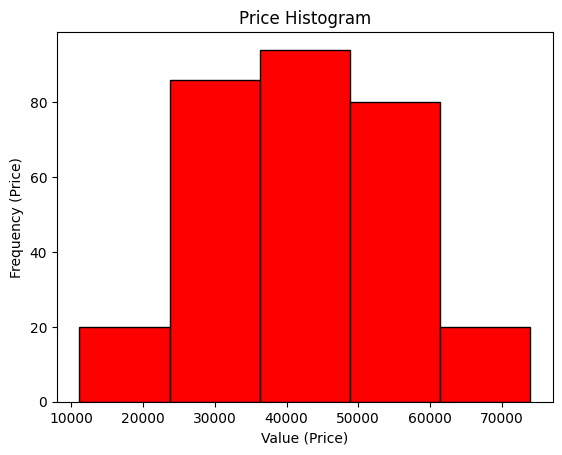

In [ ]:
plt.hist(y, bins=5, edgecolor='black', color='red')
plt.xlabel('Value (Price)')
plt.ylabel('Frequency (Price)')
plt.title('Price Histogram')
plt.show()

<b><i>Remarks:</b></i>
The given data shows that the Mean House Price is <b>42182.33</b>. This means that for every house being featured in the dataset, the price is more or less than the Mean House Price. The center most value from the range of prices is <b>40,562.5</b>. Disregarding the most extreme values in the dataset, the House Price would be more or less <b>40,562.5</b>. From the given dataset, there are <b>4 Modal Values</b>. House Prices that occur the most are <b>38500</b>, <b>40575</b>, <b>50000</b>, and <b>57950</b>.

The standard deviation of the given dataset is <b>12547.23</b>. The insight that can be garnered from this information is that the house prices can deviate from the mean for up to <b>12547.23</b>, positively or negatively, on average

As for the computed Inter Quartile Range, the dataset has <b>NO</b> values extremely deviated from the mean, having an outlier count of <b>0</b>, and given Quartile 1 as <b>33393.75</b>, Quartile 3 as <b>51012.5</b>, and the Interquartile Range as <b>17618.75.</b>

The Histogram also shows the distribution of values between its minimum and maximum. It can be seen that the <b>Mean</b>, <b>Median</b>, and <b>Mode</b> are within, or very close to, the third bar where most values in the dataset are concentrated, having over <b>80</b> house prices around that price range.

<hr><b>B.</b> Creating the multiple linear regression model using the 'price' column as the dependent variable and the following columns as the independent variables:
- size
- bedrooms
- bathrooms
- extra rooms
- garage
- garden
- inSubdivision
- inCity
- solarPowered


In [ ]:
# Multiple Linear Regression Model

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients [   23.64164579  1693.47886436  1323.6228889   3379.86263018
  9203.30333105 15142.73030088 -4983.30028436 11828.43154846
  4386.91578644]
Intercept: 7889.752206153738


<b><i>Remarks:</b></i>
Multiple Linear Regression Models include not just one independent variable to determine or predict the house price, but at least 2. The variables have 'weights' from which the concept is similar to neural networks which suggests how much the variable affects the corresponding price. The positivity or negativity of the coefficient also suggests the correlation of the said variable to price. For instance, if the coefficient is negative, the correlation towards the price is negative as well and likewise among others. Lastly, the intercept is the default price value if all the independent variables are 0, similar to Simple Linear Regression.


<hr><b>C.</b> Evaluate the developed multiple regression model based on difference performance metrics.

In [ ]:
# Test the Model

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 1716665.6339014664
Root Mean Squared Error: 1310.2158730153847
Mean Absolute Error: 1051.4769234440075
R-squared Score: 0.9868242124457476


<b><i>Remarks:</b></i>
The Root Mean Squared Error computed value is <b>1310.22</b>. This suggests that the Mulitple Linear Regression is performing excellently as its results have a very small magnitude of error compared to the actual value.

The Mean Absolute Error computed is <b>1051.48</b>. The implication of this result delivers to us a very good performance from the regression model as this suggests that the average absolute difference between the actual and predicted is very small, given the computed amount.

Lastly, R-Squared Score is computed to be at <b>0.98682</b>. A R-Squared Score closer to 1 indicates closer to perfect predictions for any given model. In comparison to our Multiple Linear Regression Model, the resulting test R2-Score is very close to 1, indicating <b>almost perfect predictions</b>.



<hr><b>D.</b> Predict the house prices on the remaining 10% unseen data.

In [ ]:
# Validate the Model

y_pred_valid = model.predict(x_valid)

mse = mean_squared_error(y_valid, y_pred_valid)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_valid, y_pred_valid)
r2 = r2_score(y_valid, y_pred_valid)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 881689.194550781
Root Mean Squared Error: 938.9830640383143
Mean Absolute Error: 751.1757380079891
R-squared Score: 0.9946221309264554


187025

<b><i>Remarks:</b></i>
Comparing both the values garnered from the testing and validation parts of the model, the results in validating the model showed even better results. Root Mean Squared Error is smaller at <b>938.98</b> during validation, compared to testing at <b>1310.22</b>. Mean Absolute Error is also smaller at <b>751.18</b> during validation, compared to testing at <b>1051.46</b>. And lastly, R-Squared Score is even closer to 1 at <b>0.99462</b> during validation, compared to testing only at <b>0.98682</b>.

With all the given comparisons for testing and validation, the results indicate that the Multiple Linear Regression Model is <b>neither underfiting nor overfitting</b> itself on the given data. To conclude, the Multiple Linear Regression Model can <b>safely</b> be used to accurately predict house prices based on various independent variables considered.